In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

%matplotlib inline

In [2]:
# Load image in BGR
img = cv2.imread('cnh_test.jpg')

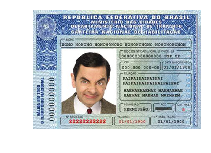

In [3]:
# Image BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3,3))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

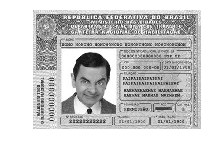

In [4]:
# Image BGR to GRAY
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

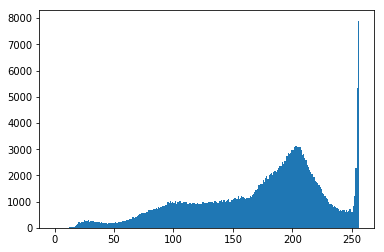

In [5]:
# Hitograma

plt.hist(img_gray.flatten(),256,[0,256])
plt.show()

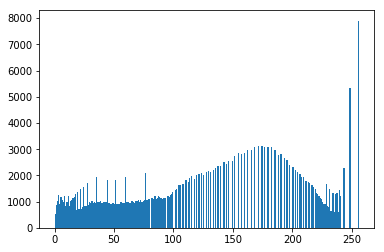

In [6]:
# Histogram equalization

equ = cv2.equalizeHist(img_gray)

plt.hist(equ.flatten(),256,[0,256])
plt.show()

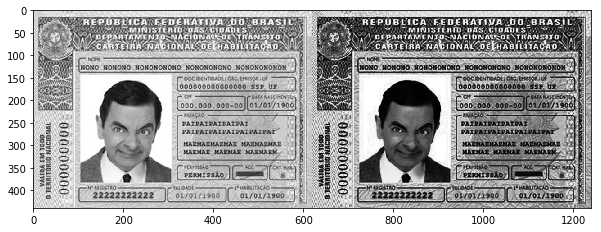

In [7]:
comp_gray_equ = np.hstack((img_gray,equ))
plt.figure(figsize=(10,10))
plt.imshow(comp_gray_equ, cmap='gray')
plt.show()

In [8]:
# Ajuste gama

def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

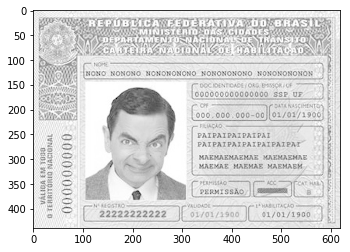

In [9]:
adjusted_img = adjust_gamma(img_gray, 2.5)
plt.imshow(adjusted_img, cmap='gray')

# FILTROS
### Passa baixa

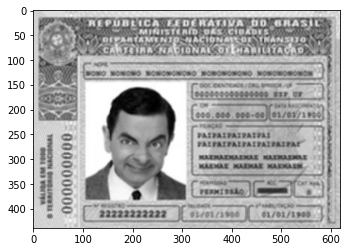

In [10]:
# Média

plt.imshow(cv2.blur(img_gray,(5,5)), cmap='gray')
plt.show()

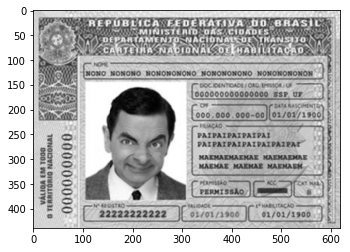

In [11]:
# Gauseano

plt.imshow(cv2.GaussianBlur(img_gray,(5,5),0), cmap='gray')
plt.show()

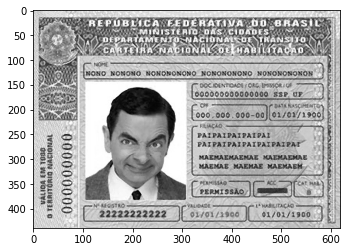

In [12]:
# Mediano

plt.imshow(cv2.medianBlur(img_gray,3), cmap='gray')
plt.show()

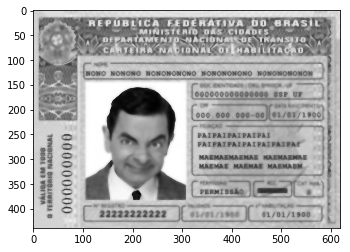

In [13]:
# Bilateral

plt.imshow(cv2.bilateralFilter(img_gray,9,75,75), cmap='gray')
plt.show()

### Filtro passa alta

In [14]:
kernel_sharp = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

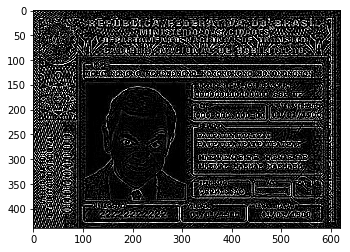

In [15]:
plt.imshow(cv2.filter2D(img_gray, -1, kernel_sharp), cmap='gray')
plt.show()

# Skew correction

In [16]:
img_gray = cv2.bitwise_not(img_gray)

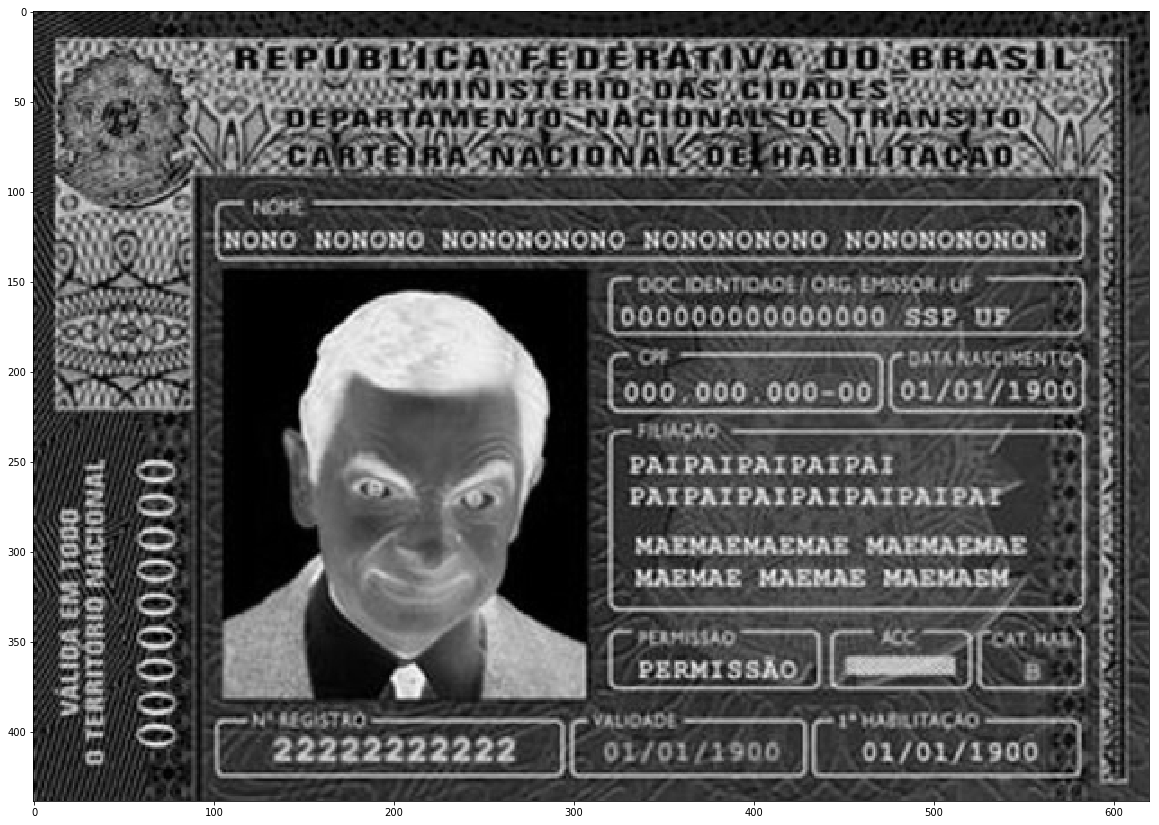

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(img_gray, cmap='gray')
plt.show()

In [18]:
thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

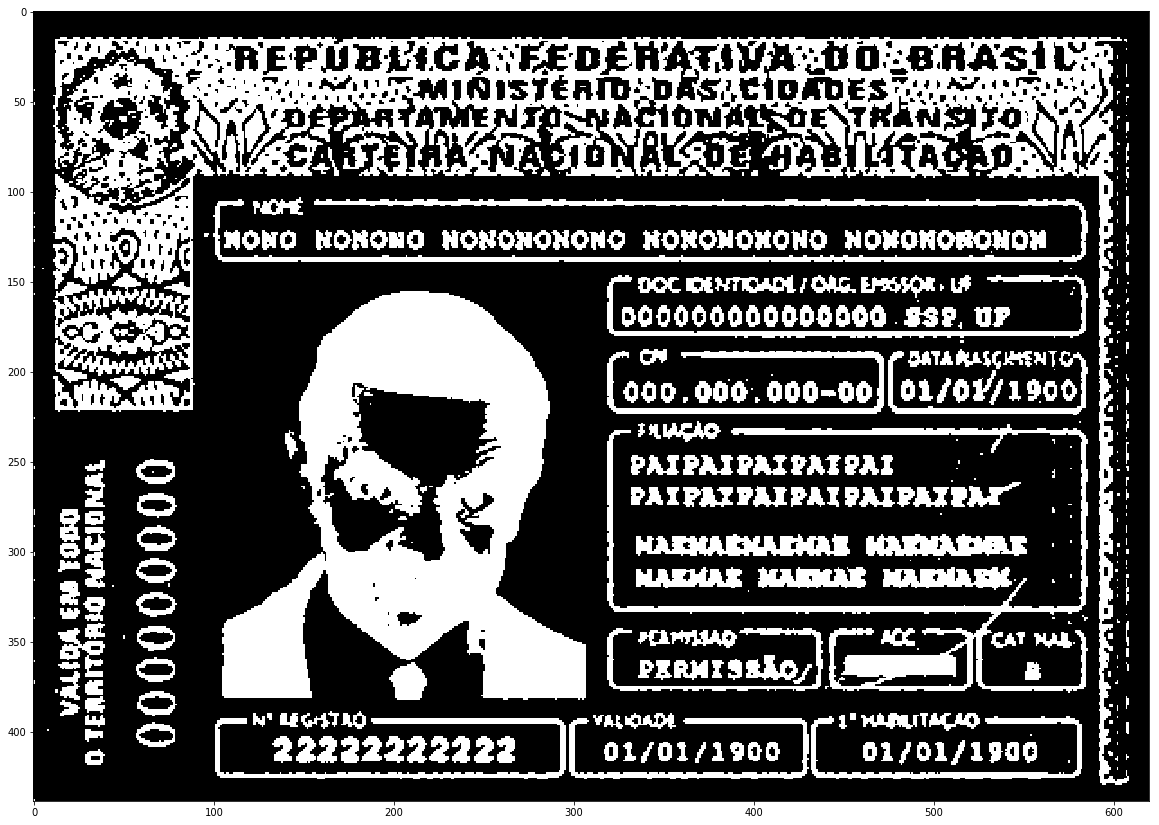

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(thresh, cmap='gray')
plt.show()

In [20]:
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]

In [21]:
if angle < -45:
    angle = -(90 + angle)

else:
    angle = -angle

In [22]:
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

[INFO] angle: 0.000


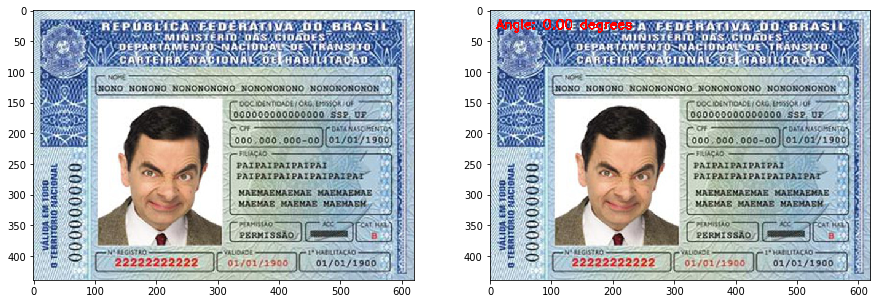

In [23]:
# draw the correction angle on the image so we can validate it
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB) )
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor( rotated ,cv2.COLOR_BGR2RGB))
plt.show()

# Detector de texto

In [24]:
img_gray.shape

(439, 620)

In [25]:
img_sobel = cv2.Sobel(img_gray, cv2.CV_8U,1,0)

In [26]:
img_threshold = cv2.threshold(img_sobel,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)

In [27]:
element = cv2.getStructuringElement(cv2.MORPH_RECT,(8,2))

In [28]:
img_threshold = cv2.morphologyEx(img_threshold[1],cv2.MORPH_CLOSE,element)

In [29]:
contours = cv2.findContours(img_threshold,0,1)

In [30]:
rect = [cv2.boundingRect(i) for i in contours[0] if i.shape[0]>100]

In [31]:
for contour in contours[0]:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 30 and h < 30:
            continue

        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

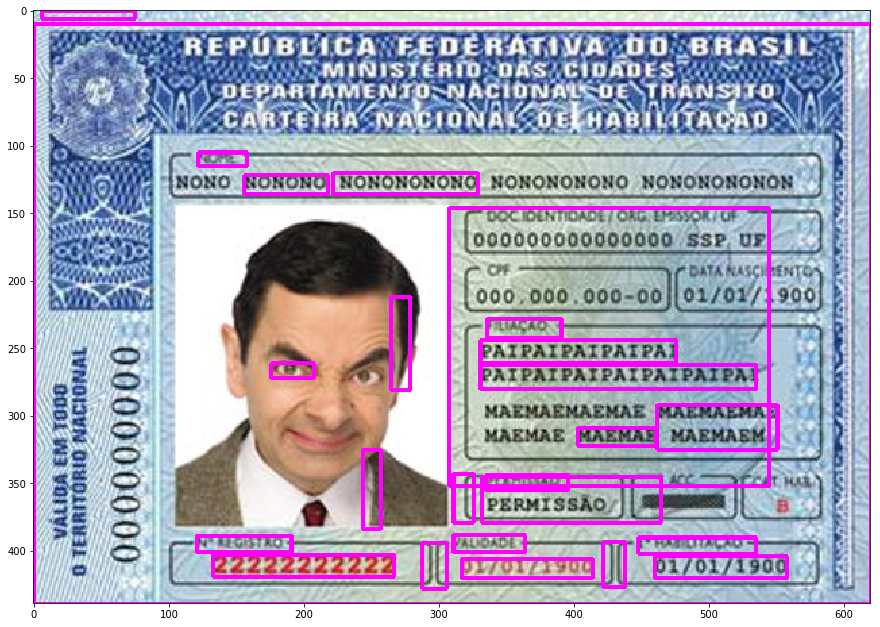

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB ))

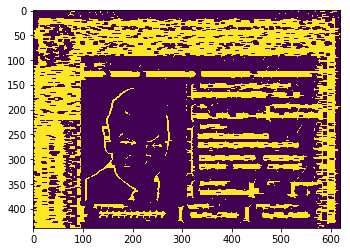

In [33]:
plt.imshow(img_threshold)